In [3]:
from ipynb.fs.full.task1_new import *
from ipynb.fs.full.task2 import *

import numpy as np
from operator import itemgetter

from PIL import Image
from numpy import asarray
from scipy.stats import skew

# load and display an image with Matplotlib
from matplotlib import image
from matplotlib import pyplot

In [4]:
HOGdescriptor = dictionaryOfHOGDescriptors
LBPdescriptor = dictionaryOfLBPDescriptors
colorMomentsdescriptor = dictionaryOfColorMomentsDescriptors

In [10]:
def calculateDistanceFromOtherImages(imageID):
    # COLOR MOMENTS

    colorMomentsOfInputImage = colorMomentsdescriptor[imageID] # recupero il descrittore dell'immagine di ID image ID
    # il descrittore contiene mean, std e skewness

    # lo trasformo in numpy array
    numpyArr = np.array(colorMomentsOfInputImage)

    dictionaryOfDistancesColorMoments = {}

    # calcolo la distanza tra l'immagine in input tra tutte quelle presenti nella cartella

    # TODO: capire se serva o no il sorted
    for (key, v) in sorted(colorMomentsdescriptor.items()):
        numpyArrOfV = np.array(v)
        dist = np.linalg.norm(numpyArr - numpyArrOfV)   # calcolo la distanza euclidea tra i due descrittori
        dictionaryOfDistancesColorMoments[key] = dist   # distanza tra l'immmagine in input e quella di nome key ('image-N')



    # HOG FEATURES
    
    HOGOfInputImage = HOGdescriptor[imageID] # recupero il descrittore dell'immagine di ID image ID
    # il descrittore contiene mean, std e skewness

    # lo trasformo in numpy array
    numpyArr = np.array(HOGOfInputImage)

    dictionaryOfDistancesHOG = {}

    # calcolo la distanza tra l'immagine in input tra tutte quelle presenti nella cartella

    # TODO: capire se serva o no il sorted
    for (key, v) in sorted(HOGdescriptor.items()):
        numpyArrOfV = np.array(v)
        dist = np.linalg.norm(numpyArr - numpyArrOfV)   # calcolo la distanza euclidea tra i due descrittori
        dictionaryOfDistancesHOG[key] = dist   # distanza tra l'immmagine in input e quella di nome key ('image-N')



    # LBP FEATURES
    
    LBPOfInputImage = LBPdescriptor[imageID] # recupero il descrittore dell'immagine di ID image ID
    # il descrittore contiene mean, std e skewness

    # lo trasformo in numpy array
    numpyArr = np.array(LBPOfInputImage)

    dictionaryOfDistancesLBP = {}

    # calcolo la distanza tra l'immagine in input tra tutte quelle presenti nella cartella

    # TODO: capire se serva o no il sorted
    for (key, v) in sorted(LBPdescriptor.items()):
        numpyArrOfV = np.array(v)
        dist = np.linalg.norm(numpyArr - numpyArrOfV)   # calcolo la distanza euclidea tra i due descrittori
        dictionaryOfDistancesLBP[key] = dist   # distanza tra l'immmagine in input e quella di nome key ('image-N')

    # creo un dizionario chiave valore:
    # 'image-11' : [3.5, 0, 9] indica che l'immagine in input dista 3.5 secondo i color moments, 0 per lbp e 9 per HOG dall'immagine in input
    dictionaryOfDistancesFromInputImage = {}

    for i in range(0, len(dir_list)):
        # TODO: sistemare il calcolo della distanza su LPB: dictionaryOfDistancesLBP[dir_list[i]]
        distance = [dictionaryOfDistancesColorMoments[dir_list[i]], 0, dictionaryOfDistancesHOG[dir_list[i]]]
        dictionaryOfDistancesFromInputImage[dir_list[i]] = distance

    #print(dictionaryOfDistancesFromInputImage)


    return dictionaryOfDistancesFromInputImage

In [11]:
dictionaryOfDistancesFromImage = calculateDistanceFromOtherImages('image-0.png')

In [7]:
def calculateKsimilarImages(imageID, k):
    vectorOfDistancesOfInputImage = dictionaryOfDistancesFromImage[imageID]
    numpyArr = np.array(vectorOfDistancesOfInputImage)

    # print(vectorOfDistancesOfInputImage)

    dictionaryOfDistances = {}

    for (key, v) in sorted(dictionaryOfDistancesFromImage.items()):
        numpyArrOfV = np.array(v)

        dist = np.linalg.norm(numpyArr - numpyArrOfV)
        dictionaryOfDistances[key] = dist

    #print(dictionaryOfDistances)

    sortedDistances = sorted(dictionaryOfDistances.items(), key = itemgetter(1))
    # Output: ['b', 'c', 'a']   

    #print(sortedDistances)

    # dict_items = sortedDistances.items()

    firstK = sortedDistances[:int(k)]

    print(firstK)

    return firstK


In [8]:
kSimilarImages = calculateKsimilarImages('image-0.png', 20)

[('image-0.png', 0.0), ('image-6.png', 7.8546146965677295), ('image-28.png', 8.136375783077444), ('image-8.png', 8.443856432742429), ('image-249.png', 8.825275599537115), ('image-256.png', 9.010512364357313), ('image-9.png', 9.038545038399672), ('image-58.png', 9.23849356993085), ('image-242.png', 9.239744643191395), ('image-229.png', 9.337958321299867), ('image-115.png', 9.417070403555906), ('image-156.png', 9.42124136396747), ('image-66.png', 9.43214716556025), ('image-29.png', 9.492279275165794), ('image-227.png', 9.556148255466303), ('image-110.png', 9.57664769701913), ('image-96.png', 9.764683949788187), ('image-221.png', 9.892170113736743), ('image-39.png', 9.959715848795394), ('image-118.png', 10.159635036226833)]


Nome dell'immagine:  image-0.png
Vettore delle distanze dall'immagine:  [0.0, 0, 0.0]
Distanza dall'immagine in input:  0.0


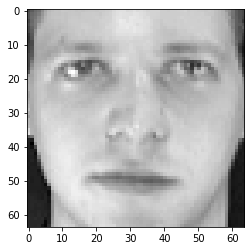

Nome dell'immagine:  image-6.png
Vettore delle distanze dall'immagine:  [4.941625518480344, 0, 6.105350871706034]
Distanza dall'immagine in input:  7.8546146965677295


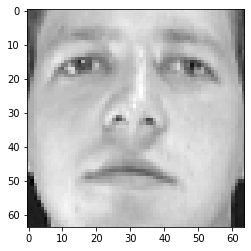

Nome dell'immagine:  image-28.png
Vettore delle distanze dall'immagine:  [3.810761222630942, 0, 7.188790565007539]
Distanza dall'immagine in input:  8.136375783077444


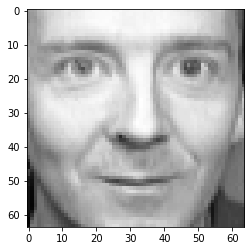

Nome dell'immagine:  image-8.png
Vettore delle distanze dall'immagine:  [4.655818088171796, 0, 7.044293391577186]
Distanza dall'immagine in input:  8.443856432742429


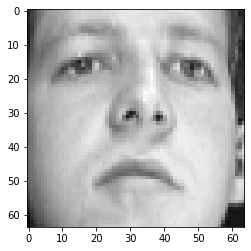

Nome dell'immagine:  image-249.png
Vettore delle distanze dall'immagine:  [4.10401628889337, 0, 7.81297252704008]
Distanza dall'immagine in input:  8.825275599537115


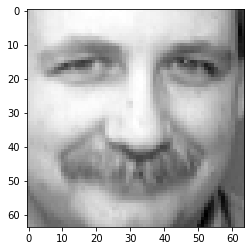

Nome dell'immagine:  image-256.png
Vettore delle distanze dall'immagine:  [5.430437923803911, 0, 7.190248745624053]
Distanza dall'immagine in input:  9.010512364357313


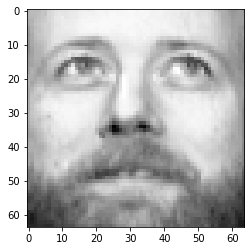

Nome dell'immagine:  image-9.png
Vettore delle distanze dall'immagine:  [4.616094961286284, 0, 7.770904948560798]
Distanza dall'immagine in input:  9.038545038399672


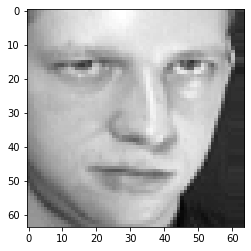

Nome dell'immagine:  image-58.png
Vettore delle distanze dall'immagine:  [4.415989443007275, 0, 8.114727394121255]
Distanza dall'immagine in input:  9.23849356993085


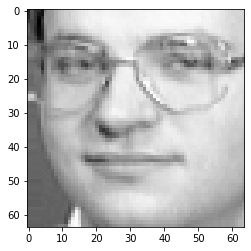

Nome dell'immagine:  image-242.png
Vettore delle distanze dall'immagine:  [4.996076793010634, 0, 7.772521968429851]
Distanza dall'immagine in input:  9.239744643191395


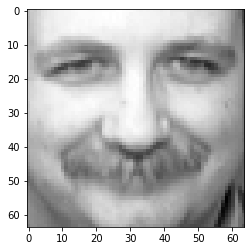

Nome dell'immagine:  image-229.png
Vettore delle distanze dall'immagine:  [5.376377826807094, 0, 7.6349215499408025]
Distanza dall'immagine in input:  9.337958321299867


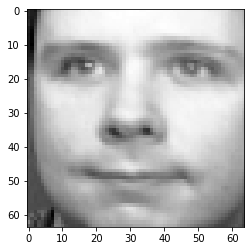

Nome dell'immagine:  image-115.png
Vettore delle distanze dall'immagine:  [6.150088118789864, 0, 7.131453646813413]
Distanza dall'immagine in input:  9.417070403555906


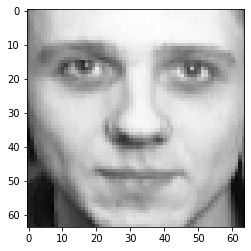

Nome dell'immagine:  image-156.png
Vettore delle distanze dall'immagine:  [5.776152549077554, 0, 7.442838878271954]
Distanza dall'immagine in input:  9.42124136396747


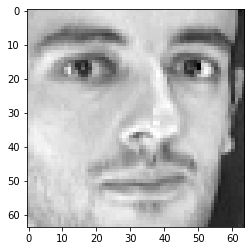

Nome dell'immagine:  image-66.png
Vettore delle distanze dall'immagine:  [5.388342148860529, 0, 7.741522398055783]
Distanza dall'immagine in input:  9.43214716556025


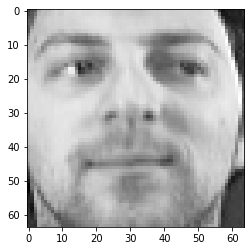

Nome dell'immagine:  image-29.png
Vettore delle distanze dall'immagine:  [5.9649784757493824, 0, 7.383928332641686]
Distanza dall'immagine in input:  9.492279275165794


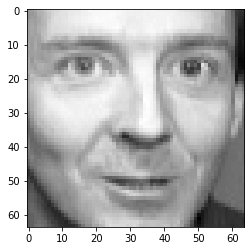

Nome dell'immagine:  image-227.png
Vettore delle distanze dall'immagine:  [4.891436094650635, 0, 8.209374057283576]
Distanza dall'immagine in input:  9.556148255466303


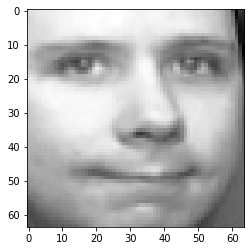

Nome dell'immagine:  image-110.png
Vettore delle distanze dall'immagine:  [6.147790268103352, 0, 7.342809811797901]
Distanza dall'immagine in input:  9.57664769701913


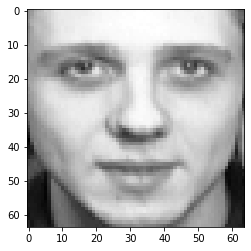

Nome dell'immagine:  image-96.png
Vettore delle distanze dall'immagine:  [5.09975874427395, 0, 8.327155179858991]
Distanza dall'immagine in input:  9.764683949788187


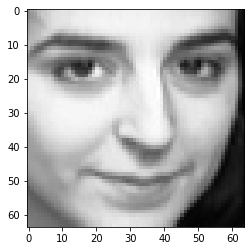

Nome dell'immagine:  image-221.png
Vettore delle distanze dall'immagine:  [5.76163575610237, 0, 8.04105608568359]
Distanza dall'immagine in input:  9.892170113736743


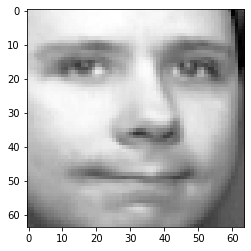

Nome dell'immagine:  image-39.png
Vettore delle distanze dall'immagine:  [6.2066159360986175, 0, 7.789342617353074]
Distanza dall'immagine in input:  9.959715848795394


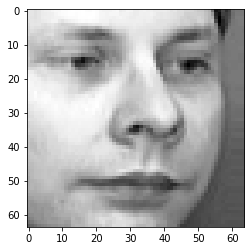

Nome dell'immagine:  image-118.png
Vettore delle distanze dall'immagine:  [6.82486562816877, 0, 7.525914776740983]
Distanza dall'immagine in input:  10.159635036226833


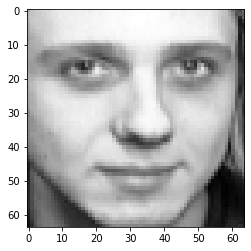

In [9]:
for i in range(0, len(kSimilarImages)):
    imageName = kSimilarImages[i][0]
    print("Nome dell'immagine: ", kSimilarImages[i][0])
    print("Vettore delle distanze dall'immagine: ", dictionaryOfDistancesFromImage[imageName])
    print("Distanza dall'immagine in input: ", kSimilarImages[i][1])

    # load the image
    image = Image.open('./olivetti_PNG_master/images/' + imageName)
    # convert image to numpy array
    # data = asarray(image)

    # display the array of pixels as an image
    # il parametro cmap serve a specificare il tipo di colormap che vogliamo utilizzare, per questo motivo abbiamo specificato gray per la scala di grigi
    pyplot.imshow(image, cmap='gray')
    pyplot.show()